In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the datasets
train_df = pd.read_csv('twitter_training.csv')
valid_df = pd.read_csv('twitter_validation.csv')

In [4]:
# Drop rows with NaN or missing values
train_df.dropna(inplace=True)
valid_df.dropna(inplace=True)

# Rename columns for easier access
train_df.columns = ['id', 'topic', 'sentiment', 'text']
valid_df.columns = ['id', 'topic', 'sentiment', 'text']

# Data Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Tokenization
        tokens = word_tokenize(text)
        # Lowercasing
        tokens = [word.lower() for word in tokens]
        # Removing stopwords
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join tokens back to string
        return ' '.join(tokens)
    else:
        return ''

# Apply preprocessing
train_df['text'] = train_df['text'].apply(preprocess_text)
valid_df['text'] = valid_df['text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
valid_df['sentiment'] = label_encoder.transform(valid_df['sentiment'])

In [5]:
# Features and Labels
X_train, y_train = train_df['text'], train_df['sentiment']
X_valid, y_valid = valid_df['text'], valid_df['sentiment']

# Initialize results list
results = []


In [6]:
# Naive Bayes with BoW
pipeline = Pipeline([
    ('BoW', CountVectorizer()),
    ('Naive Bayes', MultinomialNB())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'BoW',
    'model': 'Naive Bayes',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})

In [7]:
# Naive Bayes with TF-IDF
pipeline = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('Naive Bayes', MultinomialNB())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'TF-IDF',
    'model': 'Naive Bayes',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})


In [8]:
# Logistic Regression with BoW
pipeline = Pipeline([
    ('BoW', CountVectorizer()),
    ('Logistic Regression', LogisticRegression(max_iter=200))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'BoW',
    'model': 'Logistic Regression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})


d:\anaconda3\envs\work\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Logistic Regression with TF-IDF
pipeline = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('Logistic Regression', LogisticRegression(max_iter=200))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'TF-IDF',
    'model': 'Logistic Regression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})


In [ ]:
# SVM with BoW
pipeline = Pipeline([
    ('BoW', CountVectorizer()),
    ('SVM', SVC())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'BoW',
    'model': 'SVM',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})

In [19]:
# SVM with TF-IDF
pipeline = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('SVM', SVC())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'TF-IDF',
    'model': 'SVM',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})

In [12]:
# Random Forest with BoW
pipeline = Pipeline([
    ('BoW', CountVectorizer()),
    ('Random Forest', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')
results.append({
    'vectorizer': 'BoW',
    'model': 'Random Forest',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'y_predict':y_pred
})


[{'vectorizer': 'BoW', 'model': 'Naive Bayes', 'accuracy': 0.8218218218218218, 'precision': 0.8323964813249712, 'recall': 0.8218218218218218, 'f1': 0.8209080112851053}, {'vectorizer': 'TF-IDF', 'model': 'Naive Bayes', 'accuracy': 0.8098098098098098, 'precision': 0.8359363342011557, 'recall': 0.8098098098098098, 'f1': 0.8078190632487383}, {'vectorizer': 'BoW', 'model': 'Logistic Regression', 'accuracy': 0.9479479479479479, 'precision': 0.9481848432997217, 'recall': 0.9479479479479479, 'f1': 0.9479931781970813}, {'vectorizer': 'TF-IDF', 'model': 'Logistic Regression', 'accuracy': 0.9219219219219219, 'precision': 0.9224593606451168, 'recall': 0.9219219219219219, 'f1': 0.9218692335417593}, {'vectorizer': 'BoW', 'model': 'Random Forest', 'accuracy': 0.960960960960961, 'precision': 0.9613602778020962, 'recall': 0.960960960960961, 'f1': 0.9609383637906737}, {'vectorizer': 'TF-IDF', 'model': 'Random Forest', 'accuracy': 0.94994994994995, 'precision': 0.9505771880392874, 'recall': 0.94994994994

NameError: name 'PdfPages' is not defined

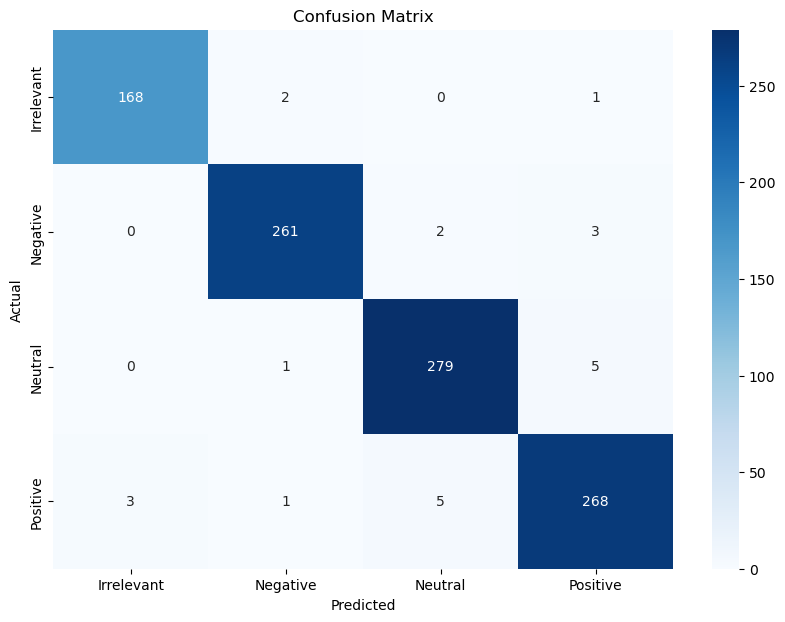

In [23]:
print(results)
# Convert results to DataFrame
results_df = pd.DataFrame(results)

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


# Identify the best model and feature engineering method
best_result = results_df.loc[results_df['f1'].idxmax()]

# Extract best model and feature engineering method
best_vectorizer_name = best_result['vectorizer']
best_model_name = best_result['model']
print (best_model_name)
# Train the best model with the best feature engineering method
best_vectorizer = TfidfVectorizer() if best_vectorizer_name == 'TF-IDF' else CountVectorizer()
print (best_vectorizer)
best_model = models[best_model_name]

pipeline = Pipeline([
    (best_vectorizer_name, best_vectorizer),
    (best_model_name, best_model)
])

pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_valid)

# # Calculate final metrics
# accuracy = accuracy_score(y_valid, y_pred)
# precision = precision_score(y_valid, y_pred, average='weighted')
# recall = recall_score(y_valid, y_pred, average='weighted')
# f1 = f1_score(y_valid, y_pred, average='weighted')

# # Print classification report
# classification_report_final = classification_report(y_valid, y_pred, target_names=label_encoder.classes_)
# print(classification_report_final)


# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_valid, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')

# # Save confusion matrix as PDF
# plt.savefig()
# plt.close()


              precision    recall  f1-score   support

  Irrelevant       0.98      0.98      0.98       171
    Negative       0.98      0.98      0.98       266
     Neutral       0.98      0.98      0.98       285
    Positive       0.97      0.97      0.97       277

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



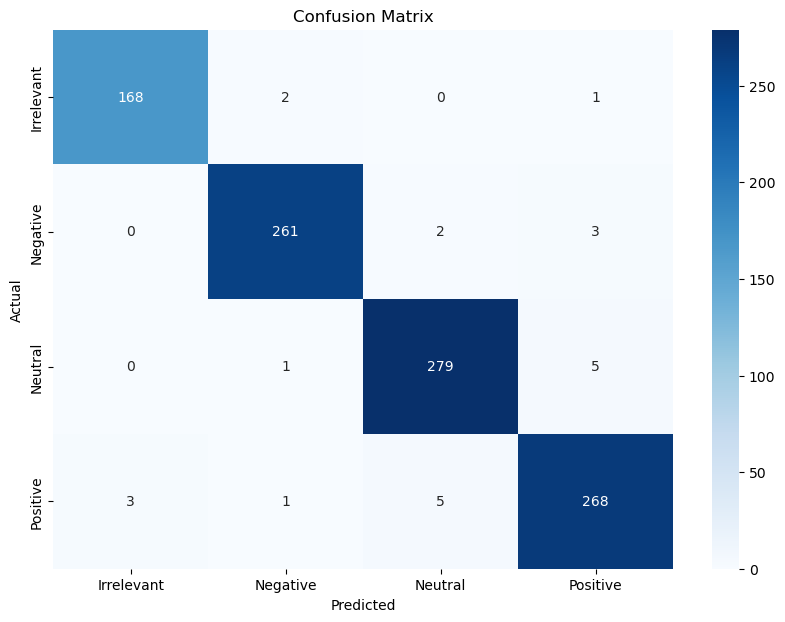

In [29]:
y_pred = pipeline.predict(X_valid)

# Calculate final metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')

# Print classification report
classification_report_final = classification_report(y_valid, y_pred, target_names=label_encoder.classes_)
print(classification_report_final)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.savefig("CM_svm_itfdf.pdf",format="pdf")
plt.show()
